In [1]:
from codes.data_loader import load_data
from codes.alg import tpr_parity_opt
from codes.metrics import fairness_visibility, accuracy, group_fairness
import numpy as np

In [2]:
def generat_result(h,y,prt_group, W):
    acc = accuracy(h,y)
    tpg ,_,_,_ = group_fairness(y, h, prt_group, return_gap = True)
    fv0, fv1, _, =fairness_visibility(W ,y, h, prt_group, output= True)
    print("   Accuracy: {:.4f} | TPR Disparity: {:.4f} | Visibility group 0: {:.4f} | Visibility group 1: {:.4f}".format(acc, tpg, fv0, fv1))
    return acc, tpg, fv0, fv1
    

In [3]:
model_f = list()
model_t = list()
original_f = list()
original_t = list()
for year in [2017, 2018, 2019,2020]:
    adj, y, h_c , prt_f, prt_t, W = load_data( year = year)
    print('year',year)
    h = tpr_parity_opt(W,y,h_c,prt_t)
    print('Orginal Decisions(Top univeristies):')
    original_t.append(generat_result(h_c,y,prt_t, W))
    print('Proposed method(Top univeristies):')
    model_t.append(generat_result(h,y,prt_t, W))
    h = tpr_parity_opt(W,y,h_c,prt_f)
    print('Orginal Decisions(Famous authors)')
    original_f.append(generat_result(h_c,y,prt_f, W))
    print('Proposed method(Famous authors):')
    model_f.append(generat_result(h,y,prt_f, W))
    print()

year 2017
Orginal Decisions(Top univeristies):
   Accuracy: 0.8238 | TPR Disparity: 0.0325 | Visibility group 0: 0.5586 | Visibility group 1: 0.6612
Proposed method(Top univeristies):
   Accuracy: 0.9221 | TPR Disparity: 0.0008 | Visibility group 0: 0.6839 | Visibility group 1: 0.7686
Orginal Decisions(Famous authors)
   Accuracy: 0.8238 | TPR Disparity: 0.0392 | Visibility group 0: 0.5445 | Visibility group 1: 0.7264
Proposed method(Famous authors):
   Accuracy: 0.9221 | TPR Disparity: 0.0258 | Visibility group 0: 0.6387 | Visibility group 1: 0.8774

year 2018
Orginal Decisions(Top univeristies):
   Accuracy: 0.7910 | TPR Disparity: 0.0199 | Visibility group 0: 0.6000 | Visibility group 1: 0.6818
Proposed method(Top univeristies):
   Accuracy: 0.9005 | TPR Disparity: 0.0053 | Visibility group 0: 0.7000 | Visibility group 1: 0.7273
Orginal Decisions(Famous authors)
   Accuracy: 0.7910 | TPR Disparity: 0.0473 | Visibility group 0: 0.6126 | Visibility group 1: 0.6957
Proposed method(Famo

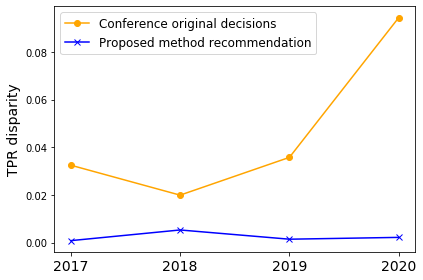

In [4]:
from matplotlib import pyplot as plt
idx = 1
f, ax = plt.subplots(figsize=(6, 4))
plt.plot([original_t[i][idx] for i in range(4)], '-o', label ='Conference original decisions',  color='orange')

ax.plot([model_t[i][idx] for i in range(4)], '-x', label= 'Proposed method recommendation',  color='blue')
plt.xticks(range(4),['2017', '2018', '2019','2020'], fontsize= 14)

plt.ylabel('TPR disparity', fontsize= 14)



plt.legend(fontsize= 12)
plt.tight_layout()
#plt.savefig('./figs/tpr_disparity_top.png')

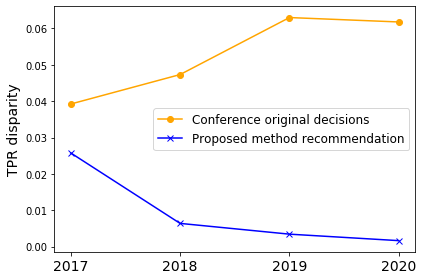

In [5]:
idx = 1
f, ax = plt.subplots(figsize=(6, 4))
plt.plot([original_f[i][idx] for i in range(4)], '-o', label ='Conference original decisions',  color='orange')

ax.plot([model_f[i][idx] for i in range(4)], '-x', label= 'Proposed method recommendation',  color='blue')
plt.xticks(range(4),['2017', '2018', '2019','2020'], fontsize= 14)

plt.ylabel('TPR disparity', fontsize= 14)

#plt.title('TPR disparity')

plt.legend(fontsize= 12)
plt.tight_layout()

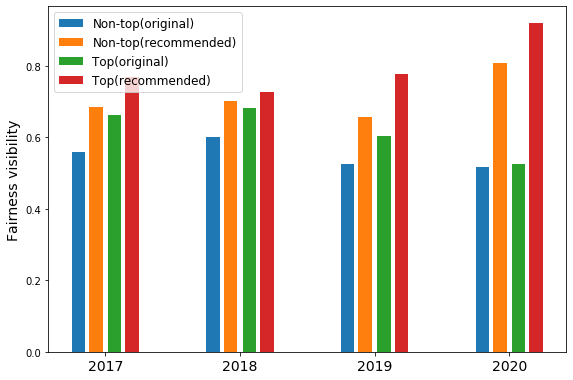

In [6]:
idx =2
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1.2,1.2])
ax.bar(X-0.20 , [original_t[i][idx] for i in range(4)], width = 0.10, label= 'Non-top(original)')
ax.bar(X-0.07, [model_t[i][idx] for i in range(4)],  width = 0.10, label= 'Non-top(recommended)')
idx = 3
ax.bar(X +0.07, [original_t[i][idx] for i in range(4)],  width = 0.10, label= 'Top(original)')
ax.bar(X +0.20, [model_t[i][idx] for i in range(4)],  width = 0.10, label= 'Top(recommended)')
plt.ylabel('Fairness visibility', fontsize= 14)
#ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
plt.xticks([x for x in range(4)],['2017', '2018', '2019','2020'], fontsize= 14)
plt.legend(fontsize= 12)

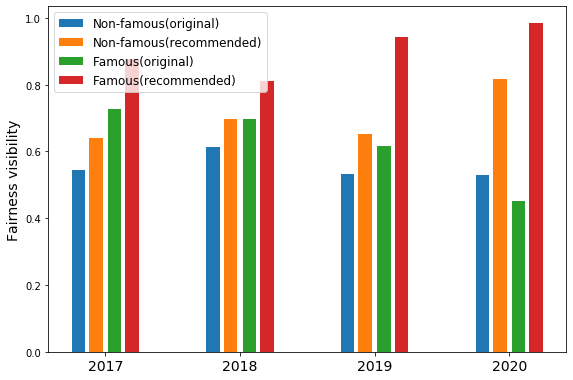

In [7]:
idx =2
X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1.2,1.2])
ax.bar(X-0.20 , [original_f[i][idx] for i in range(4)], width = 0.10, label= 'Non-famous(original)')
ax.bar(X-0.07, [model_f[i][idx] for i in range(4)],  width = 0.10, label= 'Non-famous(recommended)')
idx = 3
ax.bar(X +0.07, [original_f[i][idx] for i in range(4)],  width = 0.10, label= 'Famous(original)')
ax.bar(X +0.20, [model_f[i][idx] for i in range(4)],  width = 0.10, label= 'Famous(recommended)')
plt.ylabel('Fairness visibility', fontsize= 14)
#ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
plt.xticks([x for x in range(4)],['2017', '2018', '2019','2020'], fontsize= 14)
plt.legend(fontsize= 12)